# IMDb Sentiment Analysis using Tensorflow

by Sean Jung (seanjeong1996@gmail.com)

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# dataset 
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

In [3]:
## hub layer
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)

In [4]:
# model
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [6]:
## compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
## evaluating the model 
results = model.evaluate(test_data.batch(512), verbose=2)

49/49 - 2s - loss: 0.8579 - accuracy: 0.5384


In [8]:
for name, value in zip(model.metrics_names, results):
    print("%s: %.3f" % (name, value))

loss: 0.858
accuracy: 0.538


In [9]:
## training
history = model.fit(train_data.batch(512), epochs=20, verbose=1)

Epoch 1/20
30/30 [==============================] - 1s 50ms/step - loss: 0.6860 - accuracy: 0.6141
Epoch 2/20
30/30 [==============================] - 1s 47ms/step - loss: 0.6117 - accuracy: 0.6556
Epoch 3/20
30/30 [==============================] - 2s 66ms/step - loss: 0.5727 - accuracy: 0.6873
Epoch 4/20
30/30 [==============================] - 1s 46ms/step - loss: 0.5372 - accuracy: 0.7161
Epoch 5/20
30/30 [==============================] - 2s 53ms/step - loss: 0.5039 - accuracy: 0.7443
Epoch 6/20
30/30 [==============================] - 2s 58ms/step - loss: 0.4719 - accuracy: 0.7693
Epoch 7/20
30/30 [==============================] - 2s 65ms/step - loss: 0.4411 - accuracy: 0.7901
Epoch 8/20
30/30 [==============================] - 2s 59ms/step - loss: 0.4115 - accuracy: 0.8086 0s - loss: 0.4128 - accuracy: 0.
Epoch 9/20
30/30 [==============================] - 2s 52ms/step - loss: 0.3836 - accuracy: 0.8261
Epoch 10/20
30/30 [==============================] - 2s 54ms/step - loss: 0.

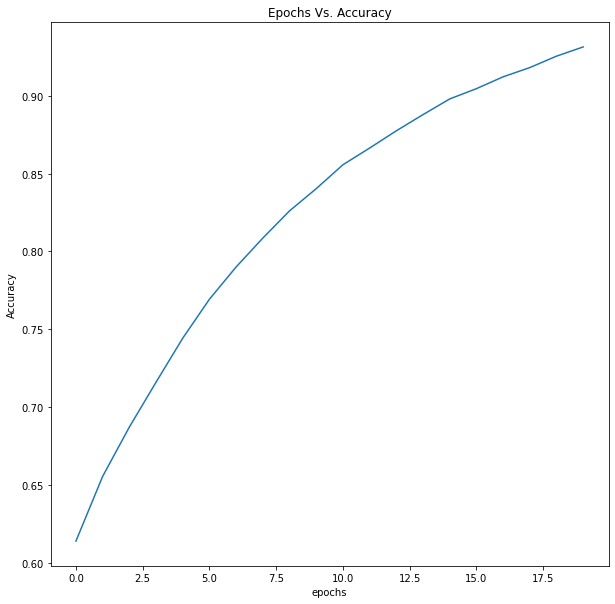

In [10]:
## accuracy vs epoch graph
plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Epochs Vs. Accuracy');

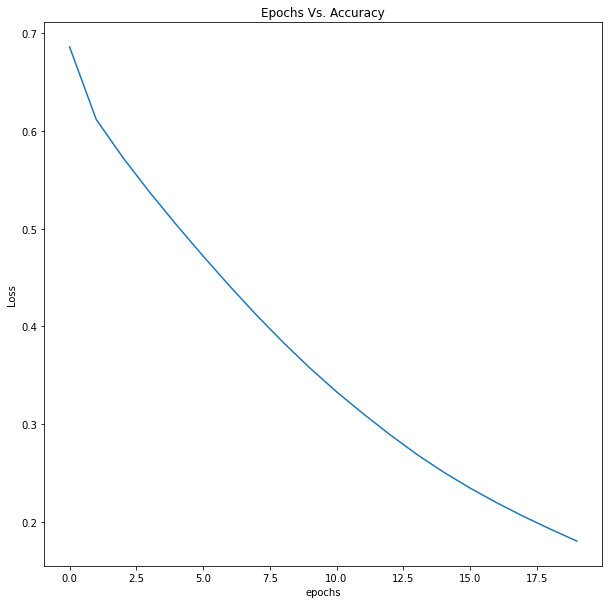

In [11]:
## Loss vs Epoch graph
plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Epochs Vs. Accuracy');